In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
cd /content/drive/My\ Drive/wisdm-dataset/arff_files/watch/accel

/content/drive/My Drive/wisdm-dataset/arff_files/watch/accel


In [32]:
pip install arff

In [0]:
#pip install --upgrade keras

#Loading files to a DataFrame

1.   List item
2.   List item



In [34]:
import pandas as pd
import arff
df_concat = pd.DataFrame()
for i in range(1600,1651):
  file = 'data_{}_accel_watch.arff'.format(i)
  #print(file)
  try:
    data = arff.load(file)
    df = pd.DataFrame(data)
    df_concat = pd.concat([df_concat,df])
  except OSError:
    print("Este arquivo não existe")
df_concat.head()

Este arquivo não existe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
0,A,0.0,0.0,0.0,0.045,0.090,0.190,0.215,0.210,0.135,0.115,0.260,0.435,0.235,0.060,0.010,0.000,0.0,0.0,0.0,0.0,0.135,0.420,0.335,0.050,0.020,0.02,0.02,0.0,0.0,0.0,12.0689,-1.13570,-0.022859,52.7027,46.3415,44.8837,3.33371,1.87644,2.00437,...,0.618168,0.613121,0.607417,0.601063,0.594066,0.586432,0.393334,0.555961,0.555067,0.553580,0.551500,0.548829,0.545570,0.541727,0.537304,0.532306,0.526738,0.520606,0.513916,0.381289,0.538935,0.538069,0.536627,0.534610,0.532021,0.528862,0.525137,0.520850,0.516005,0.510607,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,1600
1,A,0.0,0.0,0.0,0.000,0.030,0.250,0.305,0.225,0.125,0.065,0.350,0.360,0.260,0.025,0.000,0.005,0.0,0.0,0.0,0.0,0.285,0.440,0.240,0.030,0.005,0.00,0.00,0.0,0.0,0.0,12.1521,-1.75208,-1.327610,39.3750,40.0000,39.1837,2.50595,2.35428,1.67891,...,0.634539,0.629358,0.623504,0.616982,0.609799,0.601963,0.424565,0.600104,0.599140,0.597534,0.595289,0.592406,0.588888,0.584740,0.579966,0.574571,0.568561,0.561942,0.554721,0.375576,0.530860,0.530007,0.528587,0.526600,0.524050,0.520939,0.517269,0.513046,0.508274,0.502957,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,1600
2,A,0.0,0.0,0.0,0.000,0.015,0.280,0.300,0.210,0.140,0.055,0.325,0.445,0.215,0.010,0.005,0.000,0.0,0.0,0.0,0.0,0.170,0.535,0.275,0.020,0.000,0.00,0.00,0.0,0.0,0.0,12.1529,-1.53875,-0.972243,43.4091,37.8846,39.7917,2.45466,1.76268,1.37839,...,0.616762,0.611726,0.606036,0.599696,0.592714,0.585098,0.371445,0.525021,0.524177,0.522773,0.520808,0.518286,0.515208,0.511580,0.507403,0.502683,0.497424,0.491633,0.485316,0.330943,0.467774,0.467023,0.465771,0.464021,0.461773,0.459032,0.455798,0.452077,0.447872,0.443187,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,1600
3,A,0.0,0.0,0.0,0.005,0.070,0.245,0.275,0.220,0.130,0.055,0.280,0.470,0.215,0.030,0.000,0.005,0.0,0.0,0.0,0.0,0.150,0.435,0.380,0.035,0.000,0.00,0.00,0.0,0.0,0.0,11.9523,-1.31171,-0.505159,45.9524,45.0000,38.9796,2.67660,1.68549,1.40901,...,0.613069,0.608064,0.602407,0.596106,0.589166,0.581595,0.376999,0.532871,0.532015,0.530589,0.528596,0.526036,0.522912,0.519229,0.514990,0.510199,0.504862,0.498985,0.492573,0.338095,0.477883,0.477115,0.475837,0.474048,0.471753,0.468952,0.465649,0.461847,0.457550,0.452764,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,1600
4,A,0.0,0.0,0.0,0.000,0.015,0.260,0.325,0.230,0.110,0.060,0.175,0.540,0.250,0.025,0.010,0.000,0.0,0.0,0.0,0.0,0.075,0.405,0.420,0.055,0.045,0.00,0.00,0.0,0.0,0.0,12.0245,-1.03888,0.240671,40.6522,40.8511,45.0000,2.36682,1.54154,1.55086,...,0.595258,0.590398,0.584906,0.578787,0.572049,0.564698,0.357504,0.505316,0.504504,0.503152,0.501261,0.498833,0.495872,0.492379,0.488359,0.483816,0.478755,0.473181,0.467101,0.327375,0.462730,0.461987,0.460749,0.459017,0.456794,0.454082,0.450884,0.447202,0.443042,0.438408,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,1600


In [35]:
len(df_concat[df_concat[0] == 'F'][0])

988

In [36]:
acoes_irrelevantes = ['F','G','H','I','J','K','L','Q','R','S']
for acoes in acoes_irrelevantes:
  df_concat = df_concat[df_concat[0] != acoes]
print(len(list(df_concat[df_concat[0] == "F"])))

93


In [37]:
df_concat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
0,A,0.0,0.0,0.0,0.045,0.090,0.190,0.215,0.210,0.135,0.115,0.260,0.435,0.235,0.060,0.010,0.000,0.0,0.0,0.0,0.0,0.135,0.420,0.335,0.050,0.020,0.02,0.02,0.0,0.0,0.0,12.0689,-1.13570,-0.022859,52.7027,46.3415,44.8837,3.33371,1.87644,2.00437,...,0.618168,0.613121,0.607417,0.601063,0.594066,0.586432,0.393334,0.555961,0.555067,0.553580,0.551500,0.548829,0.545570,0.541727,0.537304,0.532306,0.526738,0.520606,0.513916,0.381289,0.538935,0.538069,0.536627,0.534610,0.532021,0.528862,0.525137,0.520850,0.516005,0.510607,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,1600
1,A,0.0,0.0,0.0,0.000,0.030,0.250,0.305,0.225,0.125,0.065,0.350,0.360,0.260,0.025,0.000,0.005,0.0,0.0,0.0,0.0,0.285,0.440,0.240,0.030,0.005,0.00,0.00,0.0,0.0,0.0,12.1521,-1.75208,-1.327610,39.3750,40.0000,39.1837,2.50595,2.35428,1.67891,...,0.634539,0.629358,0.623504,0.616982,0.609799,0.601963,0.424565,0.600104,0.599140,0.597534,0.595289,0.592406,0.588888,0.584740,0.579966,0.574571,0.568561,0.561942,0.554721,0.375576,0.530860,0.530007,0.528587,0.526600,0.524050,0.520939,0.517269,0.513046,0.508274,0.502957,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,1600
2,A,0.0,0.0,0.0,0.000,0.015,0.280,0.300,0.210,0.140,0.055,0.325,0.445,0.215,0.010,0.005,0.000,0.0,0.0,0.0,0.0,0.170,0.535,0.275,0.020,0.000,0.00,0.00,0.0,0.0,0.0,12.1529,-1.53875,-0.972243,43.4091,37.8846,39.7917,2.45466,1.76268,1.37839,...,0.616762,0.611726,0.606036,0.599696,0.592714,0.585098,0.371445,0.525021,0.524177,0.522773,0.520808,0.518286,0.515208,0.511580,0.507403,0.502683,0.497424,0.491633,0.485316,0.330943,0.467774,0.467023,0.465771,0.464021,0.461773,0.459032,0.455798,0.452077,0.447872,0.443187,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,1600
3,A,0.0,0.0,0.0,0.005,0.070,0.245,0.275,0.220,0.130,0.055,0.280,0.470,0.215,0.030,0.000,0.005,0.0,0.0,0.0,0.0,0.150,0.435,0.380,0.035,0.000,0.00,0.00,0.0,0.0,0.0,11.9523,-1.31171,-0.505159,45.9524,45.0000,38.9796,2.67660,1.68549,1.40901,...,0.613069,0.608064,0.602407,0.596106,0.589166,0.581595,0.376999,0.532871,0.532015,0.530589,0.528596,0.526036,0.522912,0.519229,0.514990,0.510199,0.504862,0.498985,0.492573,0.338095,0.477883,0.477115,0.475837,0.474048,0.471753,0.468952,0.465649,0.461847,0.457550,0.452764,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,1600
4,A,0.0,0.0,0.0,0.000,0.015,0.260,0.325,0.230,0.110,0.060,0.175,0.540,0.250,0.025,0.010,0.000,0.0,0.0,0.0,0.0,0.075,0.405,0.420,0.055,0.045,0.00,0.00,0.0,0.0,0.0,12.0245,-1.03888,0.240671,40.6522,40.8511,45.0000,2.36682,1.54154,1.55086,...,0.595258,0.590398,0.584906,0.578787,0.572049,0.564698,0.357504,0.505316,0.504504,0.503152,0.501261,0.498833,0.495872,0.492379,0.488359,0.483816,0.478755,0.473181,0.467101,0.327375,0.462730,0.461987,0.460749,0.459017,0.456794,0.454082,0.450884,0.447202,0.443042,0.438408,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,1600


In [0]:
df_concat = df_concat.replace('A','CAMINHADA')

In [0]:
df_concat = df_concat.replace('B','MODERADA')
df_concat = df_concat.replace('C','MODERADA')

In [0]:
df_concat = df_concat.replace('M','VIGOROSA')
df_concat = df_concat.replace('O','VIGOROSA')
df_concat = df_concat.replace('P','VIGOROSA')

In [0]:
df_concat = df_concat.replace('D','INATIVO')
df_concat = df_concat.replace('E','INATIVO')

#Treinando uma RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)

#Selecionando apenas ações relevantes

In [0]:
random_forest  = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
y_predit = random_forest.predict(X_test)
cm = confusion_matrix(y_test,y_predit)

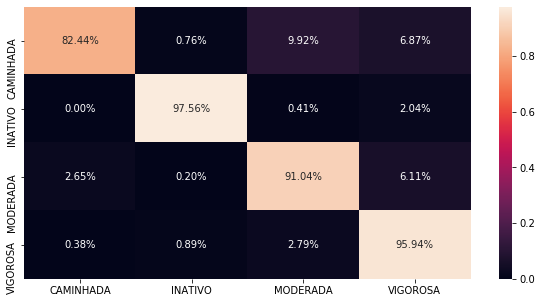

In [45]:
index = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
columns = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm_df = pd.DataFrame(cm,index,columns)            
plt.figure(figsize=(10,5))  
sns.heatmap(cm_df, annot=True,fmt=".2%")

In [46]:
accuracy_score(y_test,y_predit)

0.9340551181102362

#Agrupando ações relevantes

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#acoes_relevantes = ['A','B','C','D','E','M','O','P']
#df_concat_filtered =  [df_concat[0].isin(acoes_relevantes)]

#SelectKBest

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#É preciso fazer one hot encoding antes de fazer o one hot enconding do Keras (por que deus???)
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_concat[0]= le.fit_transform(df_concat[0])

In [0]:
#from keras.utils import to_categorical
#df_target = to_categorical(df_target)# split into input (X) and output (Y) variables

In [51]:
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
df_concat_new = SelectKBest(mutual_info_classif, k=40).fit_transform(df_values, df_target)
df_concat_new = pd.DataFrame(df_concat_new)
df_concat_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,3.33371,1.87644,2.00437,0.287813,0.180374,0.206957,0.536482,0.424704,0.454925,0.448836,0.634409,0.63339,0.631693,0.629319,0.626271,0.622553,0.618168,0.613121,0.607417,0.601063,0.594066,0.586432,0.393334,0.555961,0.555067,0.55358,0.5515,0.548829,0.54557,0.541727,0.537304,0.532306,0.526738,0.520606,0.513916,0.538069,0.528862,0.52085,0.498178,12.7783
1,2.50595,2.35428,1.67891,0.220688,0.216164,0.152043,0.469775,0.464935,0.389927,0.460722,0.651211,0.650165,0.648422,0.645986,0.642857,0.63904,0.634539,0.629358,0.623504,0.616982,0.609799,0.601963,0.424565,0.600104,0.59914,0.597534,0.595289,0.592406,0.588888,0.58474,0.579966,0.574571,0.568561,0.561942,0.554721,0.530007,0.520939,0.513046,0.490714,12.8712
2,2.45466,1.76268,1.37839,0.210443,0.1561,0.124489,0.458741,0.395095,0.35283,0.447815,0.632966,0.63195,0.630256,0.627888,0.624847,0.621137,0.616762,0.611726,0.606036,0.599696,0.592714,0.585098,0.371445,0.525021,0.524177,0.522773,0.520808,0.518286,0.515208,0.51158,0.507403,0.502683,0.497424,0.491633,0.485316,0.467023,0.459032,0.452077,0.432398,12.5949
3,2.6766,1.68549,1.40901,0.232177,0.158364,0.123818,0.481847,0.397949,0.351878,0.445134,0.629177,0.628166,0.626483,0.624128,0.621106,0.617418,0.613069,0.608064,0.602407,0.596106,0.589166,0.581595,0.376999,0.532871,0.532015,0.530589,0.528596,0.526036,0.522912,0.519229,0.51499,0.510199,0.504862,0.498985,0.492573,0.477115,0.468952,0.461847,0.441743,12.3521
4,2.36682,1.54154,1.55086,0.203347,0.144357,0.146905,0.45094,0.379944,0.383281,0.432201,0.610898,0.609916,0.608282,0.605996,0.603061,0.599481,0.595258,0.590398,0.584906,0.578787,0.572049,0.564698,0.357504,0.505316,0.504504,0.503152,0.501261,0.498833,0.495872,0.492379,0.488359,0.483816,0.478755,0.473181,0.467101,0.461987,0.454082,0.447202,0.427736,12.4168


#PCA

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_concat[0]= le.fit_transform(df_concat[0])
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
#df_simulation[0]= le.fit_transform(df_simulation[0])
#df_values = df_simulation.drop(columns=0)
#df_target_simulation = df_simulation[0]

pca = PCA(n_components = 90,svd_solver = 'full')
pca.fit(df_concat)
df_concat_new = pca.transform(df_concat)
df_concat_new = pd.DataFrame(df_concat_new)
df_concat_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,-6.988113,24.819618,-8.519803,-2.960030,-6.852361,1.725999,0.542788,1.231086,1.713754,0.182250,1.327686,-0.766976,-0.032895,0.587803,0.232022,-0.506493,-0.360093,-0.143652,-0.080726,0.153548,-0.078430,-0.107561,0.219562,0.136495,-0.028719,0.101767,0.060183,-0.040136,0.144276,-0.060687,-0.069379,0.027360,0.063282,0.052526,0.120775,-0.033059,-0.043850,-0.060727,0.036639,0.024620,...,-0.002454,0.000808,0.001188,0.000103,-2.351670e-07,-5.513487e-07,3.022498e-07,-6.290887e-10,5.618299e-07,4.984175e-07,7.004654e-09,-4.019539e-08,4.743010e-09,9.826607e-09,3.477788e-07,-2.259591e-07,-1.350675e-07,1.552128e-07,3.270234e-07,6.385236e-07,-1.039652e-07,-2.312703e-07,-3.253250e-07,-3.288979e-08,3.908362e-07,1.388352e-07,2.144414e-07,-1.146896e-07,2.702729e-07,-1.729689e-07,-4.571221e-08,3.532009e-07,2.928224e-08,5.546516e-07,9.940058e-09,-6.188627e-08,-7.048145e-07,-3.838560e-07,-1.499031e-07,-1.394689e-07
1,-22.057828,20.599936,-9.416219,-2.484835,-7.276228,-0.163177,-1.168720,1.631094,1.998170,0.028084,0.738263,-0.188410,0.444639,0.466810,0.140047,-0.628853,-0.558386,-0.018859,0.137300,-0.267677,-0.120796,-0.117138,0.122228,0.089852,-0.072500,0.065161,-0.035002,0.050191,0.119077,-0.110802,-0.144937,-0.028327,0.005016,0.010384,0.073825,0.001252,-0.031471,0.005236,0.056651,0.027961,...,0.000139,0.000386,-0.000333,-0.000038,-6.719262e-07,-1.793603e-07,3.546968e-07,-5.398203e-08,3.899398e-07,-1.228387e-07,4.313333e-07,-6.809108e-07,1.763178e-08,-1.782504e-07,-1.503797e-07,7.750903e-08,-1.952774e-07,-2.638756e-07,-9.776404e-08,7.721496e-08,-5.034622e-07,7.761752e-08,-1.009121e-07,6.212214e-07,9.699612e-09,-7.585787e-10,1.530360e-08,-4.075443e-07,-2.964169e-07,-5.677787e-08,1.172784e-07,1.455831e-07,5.288041e-08,1.168078e-07,-4.668822e-07,6.863347e-08,-6.414558e-07,1.593858e-07,2.438021e-07,3.050394e-08
2,-19.978031,22.674513,-6.118909,-1.302239,-6.885103,0.688408,-1.079620,1.498444,2.083121,0.234037,0.753383,-0.441616,0.252893,0.513846,-0.020667,-0.414094,-0.640308,-0.136288,0.106091,-0.086344,0.022869,-0.132574,0.169503,0.076653,-0.069056,-0.016906,-0.006786,-0.016452,0.116499,-0.123225,-0.089163,-0.052400,0.062435,0.021313,0.057321,-0.018576,-0.017115,-0.012778,0.055659,0.018707,...,-0.000522,0.000519,-0.000345,-0.000158,3.632864e-07,-3.338734e-07,-7.414533e-07,3.890554e-07,-4.464698e-08,1.723894e-07,4.290378e-07,7.984546e-07,6.813849e-08,-2.295944e-07,2.580297e-08,-1.424205e-07,7.026448e-08,-2.658621e-07,-2.648585e-07,-1.526443e-07,-3.280119e-07,-3.728753e-07,2.990768e-07,1.095234e-07,-5.945587e-08,-3.703477e-07,-2.286910e-07,-5.249453e-07,-1.357473e-07,-6.301199e-07,-2.631124e-07,3.008976e-07,2.167405e-07,8.582393e-08,-4.467627e-07,4.007817e-07,1.408266e-07,6.996515e-08,-2.619761e-07,-7.329913e-08
3,-15.020522,22.010286,-8.916870,-6.078782,-7.296095,1.932581,-0.390878,1.417879,1.600820,0.180724,1.047509,-0.563341,0.059793,0.509543,0.130020,-0.399357,-0.567790,0.009213,0.155575,-0.162512,0.009391,-0.163141,0.156026,0.134617,-0.068004,0.080830,0.001692,-0.005519,0.104697,-0.057767,-0.072807,-0.025230,0.043658,0.019800,0.076246,-0.016199,-0.025068,-0.014342,0.070096,0.018333,...,0.000048,0.000038,-0.000326,-0.000174,2.197490e-07,-1.660492e-07,3.438660e-07,-4.498567e-07,6.991509e-07,-1.296452e-07,2.873962e-07,-2.412373e-07,-6.048840e-07,3.416351e-07,6.329859e-07,-1.004870e-07,-1.184449e-07,5.293227e-08,-7.957077e-08,-1.816176e-07,2.993960e-07,4.000392e-07,-6.695204e-08,-1.037235e-07,-3.218395e-07,9.286616e-08,-4.693333e-08,4.836292e-09,4.775277e-07,2.464095e-08,5.933845e-07,-5.647759e-08,-1.264629e-07,2.150614e-07,1.174275e-08,1.951416e-07,1.148820e-07,1.612712e-07,1.136564e-07,4.458140e-07
4,-18.486451,21.251272,-11.549467,1.760540,-6.785127,1.204353,0.303330,1.173929,1.872158,0.126026,0.966464,-0.520213,-0.3

[0, 47.1, 66.6, 82.32, 92.6, 95.55, 97.54, 98.57, 99.49, 99.62, 99.72, 99.78, 99.82, 99.86, 99.89, 99.91, 99.92, 99.93, 99.95, 99.96, 99.96, 99.97, 99.98, 99.98, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
PCA Score is 47.1 using 1 components
PCA Score is 82.32 using 3 components
PCA Score is 92.6 using 4 components
PCA Score is 95.55 using 5 components
PCA Score is 97.54 using 6 components


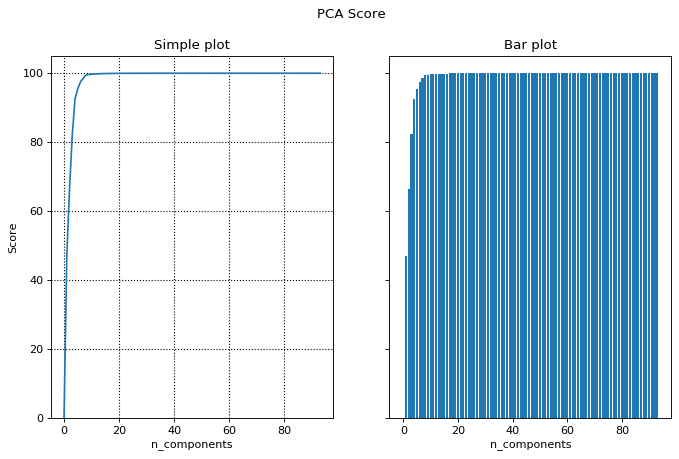

In [53]:
import numpy as np
pca = PCA(svd_solver='full', n_components = df_concat.shape[1])
pca.fit(df_concat)

pca_sum_score = [(round(sum(pca.explained_variance_ratio_[0:n])*100,2)) for n in range(pca.n_components+1)]

fig4, ax4 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k', sharey=True)
fig4.suptitle('PCA Score') # or plt.suptitle('Main title')
ax4[0].plot(pca_sum_score)
ax4[0].title.set_text('Simple plot')
ax4[0].set_xlabel('n_components')
ax4[0].set_ylabel('Score')
ax4[0].grid(color='k', linestyle=':', linewidth=1)

ax4[1].bar(np.arange(pca.n_components+1),pca_sum_score)
ax4[1].title.set_text('Bar plot')
ax4[1].set_xlabel('n_components')

print(pca_sum_score)

pca_threshold = [50,75,90,95,97]

for threshold in pca_threshold:
    print("PCA Score is {} using {} components".format(min(pca_sum_score, key=lambda x:abs(x-threshold)),pca_sum_score.index(min(pca_sum_score, key=lambda x:abs(x-threshold)))))

In [0]:
df_values = df_concat_new.drop(columns=0)

In [0]:
df_values = df_concat_new.drop(columns=0)
df_target = df_concat[0]
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)

In [0]:
random_forest  = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1,criterion='entropy')
random_forest = random_forest.fit(X_train, y_train)
y_predit = random_forest.predict(X_test)

#KFold

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
df_values = df_concat_new.drop(columns=0)
df_target = df_concat[0]
scores = cross_val_score(RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1,criterion='entropy'), df_values, df_target, cv=10,scoring="accuracy")

In [58]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.05)


In [59]:
df_values.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,24.819618,-8.519803,-2.960030,-6.852361,1.725999,0.542788,1.231086,1.713754,0.182250,1.327686,-0.766976,-0.032895,0.587803,0.232022,-0.506493,-0.360093,-0.143652,-0.080726,0.153548,-0.078430,-0.107561,0.219562,0.136495,-0.028719,0.101767,0.060183,-0.040136,0.144276,-0.060687,-0.069379,0.027360,0.063282,0.052526,0.120775,-0.033059,-0.043850,-0.060727,0.036639,0.024620,0.037480,...,-0.002454,0.000808,0.001188,0.000103,-2.351670e-07,-5.513487e-07,3.022498e-07,-6.290887e-10,5.618299e-07,4.984175e-07,7.004654e-09,-4.019539e-08,4.743010e-09,9.826607e-09,3.477788e-07,-2.259591e-07,-1.350675e-07,1.552128e-07,3.270234e-07,6.385236e-07,-1.039652e-07,-2.312703e-07,-3.253250e-07,-3.288979e-08,3.908362e-07,1.388352e-07,2.144414e-07,-1.146896e-07,2.702729e-07,-1.729689e-07,-4.571221e-08,3.532009e-07,2.928224e-08,5.546516e-07,9.940058e-09,-6.188627e-08,-7.048145e-07,-3.838560e-07,-1.499031e-07,-1.394689e-07
1,20.599936,-9.416219,-2.484835,-7.276228,-0.163177,-1.168720,1.631094,1.998170,0.028084,0.738263,-0.188410,0.444639,0.466810,0.140047,-0.628853,-0.558386,-0.018859,0.137300,-0.267677,-0.120796,-0.117138,0.122228,0.089852,-0.072500,0.065161,-0.035002,0.050191,0.119077,-0.110802,-0.144937,-0.028327,0.005016,0.010384,0.073825,0.001252,-0.031471,0.005236,0.056651,0.027961,0.014881,...,0.000139,0.000386,-0.000333,-0.000038,-6.719262e-07,-1.793603e-07,3.546968e-07,-5.398203e-08,3.899398e-07,-1.228387e-07,4.313333e-07,-6.809108e-07,1.763178e-08,-1.782504e-07,-1.503797e-07,7.750903e-08,-1.952774e-07,-2.638756e-07,-9.776404e-08,7.721496e-08,-5.034622e-07,7.761752e-08,-1.009121e-07,6.212214e-07,9.699612e-09,-7.585787e-10,1.530360e-08,-4.075443e-07,-2.964169e-07,-5.677787e-08,1.172784e-07,1.455831e-07,5.288041e-08,1.168078e-07,-4.668822e-07,6.863347e-08,-6.414558e-07,1.593858e-07,2.438021e-07,3.050394e-08
2,22.674513,-6.118909,-1.302239,-6.885103,0.688408,-1.079620,1.498444,2.083121,0.234037,0.753383,-0.441616,0.252893,0.513846,-0.020667,-0.414094,-0.640308,-0.136288,0.106091,-0.086344,0.022869,-0.132574,0.169503,0.076653,-0.069056,-0.016906,-0.006786,-0.016452,0.116499,-0.123225,-0.089163,-0.052400,0.062435,0.021313,0.057321,-0.018576,-0.017115,-0.012778,0.055659,0.018707,0.027279,...,-0.000522,0.000519,-0.000345,-0.000158,3.632864e-07,-3.338734e-07,-7.414533e-07,3.890554e-07,-4.464698e-08,1.723894e-07,4.290378e-07,7.984546e-07,6.813849e-08,-2.295944e-07,2.580297e-08,-1.424205e-07,7.026448e-08,-2.658621e-07,-2.648585e-07,-1.526443e-07,-3.280119e-07,-3.728753e-07,2.990768e-07,1.095234e-07,-5.945587e-08,-3.703477e-07,-2.286910e-07,-5.249453e-07,-1.357473e-07,-6.301199e-07,-2.631124e-07,3.008976e-07,2.167405e-07,8.582393e-08,-4.467627e-07,4.007817e-07,1.408266e-07,6.996515e-08,-2.619761e-07,-7.329913e-08
3,22.010286,-8.916870,-6.078782,-7.296095,1.932581,-0.390878,1.417879,1.600820,0.180724,1.047509,-0.563341,0.059793,0.509543,0.130020,-0.399357,-0.567790,0.009213,0.155575,-0.162512,0.009391,-0.163141,0.156026,0.134617,-0.068004,0.080830,0.001692,-0.005519,0.104697,-0.057767,-0.072807,-0.025230,0.043658,0.019800,0.076246,-0.016199,-0.025068,-0.014342,0.070096,0.018333,0.024329,...,0.000048,0.000038,-0.000326,-0.000174,2.197490e-07,-1.660492e-07,3.438660e-07,-4.498567e-07,6.991509e-07,-1.296452e-07,2.873962e-07,-2.412373e-07,-6.048840e-07,3.416351e-07,6.329859e-07,-1.004870e-07,-1.184449e-07,5.293227e-08,-7.957077e-08,-1.816176e-07,2.993960e-07,4.000392e-07,-6.695204e-08,-1.037235e-07,-3.218395e-07,9.286616e-08,-4.693333e-08,4.836292e-09,4.775277e-07,2.464095e-08,5.933845e-07,-5.647759e-08,-1.264629e-07,2.150614e-07,1.174275e-08,1.951416e-07,1.148820e-07,1.612712e-07,1.136564e-07,4.458140e-07
4,21.251272,-11.549467,1.760540,-6.785127,1.204353,0.303330,1.173929,1.872158,0.126026,0.966464,-0.520213,-0.305534,0.639661,0.

In [60]:
index = ['INATIVO','MODERADA','VIGOROSA']
columns = ['INATIVO','MODERADA','VIGOROSA']
cm_matrix = confusion_matrix(y_test,y_predit)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm_df = pd.DataFrame(cm,index,columns)            
plt.figure(figsize=(10,5))  
sns.heatmap(cm_df, annot=True,fmt=".2%")

ValueError: ignored

In [0]:
#precisão
precisao_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[0][1]+cm_matrix[0][2])
precisao_moderada = cm_matrix[1][1]/(cm_matrix[1][0]+cm_matrix[1][1]+cm_matrix[1][2])
precisao_vigorosa = cm_matrix[2][2]/(cm_matrix[2][0]+cm_matrix[2][1]+cm_matrix[2][2])
#Sensibilidade
sensibilidade_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[1][0]+cm_matrix[2][0])
sensibilidade_moderada = cm_matrix[1][1]/(cm_matrix[0][1]+cm_matrix[1][1]+cm_matrix[2][1])
sensibilidade_vigorosa = cm_matrix[2][2]/(cm_matrix[0][2]+cm_matrix[1][2]+cm_matrix[2][2])

In [0]:
accuracy_score(y_test,y_predit)

#Rede neural

In [0]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder 
from keras.utils import to_categorical
import keras
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#One hot encoding
df_values = df_concat_new.drop(columns=0)
df_target = df_concat[0]
#print(df_target)
df_target = to_categorical(df_target)# split into input (X) and output (Y) variables
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)
# create model
model = Sequential()
model.add(Dense(16, input_dim=89, init= 'uniform', activation='sigmoid'))
model.add(Dense(4,activation='softmax'))

# Compile model
model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, nb_epoch=40, batch_size=64, validation_data = (X_test,y_test))
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
#print(weights,biases)
#evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
y_predict = model.predict_classes(X_test)

In [0]:
df_target = df_concat[0]
#print(df_target)
df_target = to_categorical(df_target)# split into input (X) and output (Y) variables

#Rede neural validação cruzada

In [0]:
df_concat.head()

In [0]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from itertools import product
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical
import keras
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold

df_values = df_concat_new.drop(columns=0)
df_values_np = df_values.to_numpy()
df_target = df_concat[0]
#Validação cruzada separada por ação -- Primeiro tipo tentado

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(df_values, df_target):
  model = Sequential()
  model.add(Dense(92, input_dim=89, init= 'uniform', activation='sigmoid'))
  model.add(Dense(3,activation='softmax'))
  df_target_outra_coisa = to_categorical(df_target)# split into input (X) and output (Y) variables


  # Compile model
  model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
  # Fit the model
  model.fit(df_values_np[train], df_target_outra_coisa[train], nb_epoch=50, batch_size=64)
	# evaluate the model
  print('To aqui')
  scores = model.evaluate(df_values_np[test], df_target_outra_coisa[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)

#Validação cruzada separando por indivíduo -- Sugestão da equipe MJV
'''groups = df_concat[92] #ids
df_values = df_concat_new.drop(columns=0)
df_values_np =df_values.to_numpy()
df_target = df_concat_new[0]

gkf = GroupKFold(n_splits=5)
cvscores = []
for train, test in gkf.split(df_values, df_target, groups=groups):
  model = Sequential()
  model.add(Dense(92, input_dim=89, init= 'uniform', activation='sigmoid'))
  model.add(Dense(3,activation='softmax'))
  df_target_categorial = to_categorical(df_target)# split into input (X) and output (Y) variables
  #print(len(df_target_categorial[0]))

  # Compile model
  model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
  # Fit the model
  model.fit(df_values_np[train], df_target_categorial[train], nb_epoch=50, batch_size=64)
  # evaluate the model
  print('To aqui')
  scores = model.evaluate(df_values_np[test], df_target_categorial[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)'''

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [0]:
groups = df_concat[92] #ids
df_values = df_concat_new.drop(columns=0)
df_values_np =df_values.to_numpy()
df_target = df_concat[0]
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=50)
for train, test in gkf.split(df_values, df_target, groups=groups):
    # Here "train", "test" are indices of location, 
    # you need to use "iloc" to get actual values
    #print("%s %s" % (train, test))  

    #print(df_concat.iloc[train, :])
    #print(df_concat.iloc[test])
    #print(test)

In [0]:
df_target

In [0]:
teste[1]

In [0]:
index = ['INATIVO','MODERADA','VIGOROSA']
columns = ['INATIVO','MODERADA','VIGOROSA']
cm = confusion_matrix(y_test,y_predit)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm_df = pd.DataFrame(cm,index,columns)            
plt.figure(figsize=(10,5))  
sns.heatmap(cm_df, annot=True,fmt=".2%")

In [0]:
accuracy_score(y_test,y_predit)